#  Support Vector Machines (SVM)

Importing libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


Loading and preparing dataset

In [16]:
data = load_breast_cancer()
X = data.data
y = data.target


In [17]:
# getting 2D data
X_vis = X[:, [0, 2]]  # mean radius & mean perimeter
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.2, random_state=42)

In [18]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the SVM with linear and RBF kernel.

In [19]:
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')

svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC(C=1)

Visualizing decision boundary using 2D data

In [ ]:
def plot_db(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("Mean Radius (scaled)")
    plt.ylabel("Mean Perimeter (scaled)")
    plt.show()

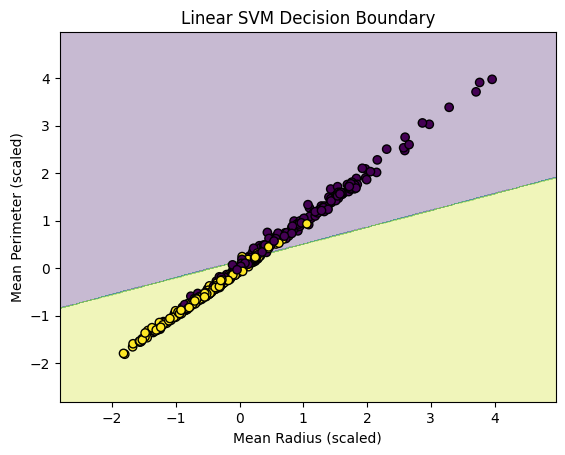

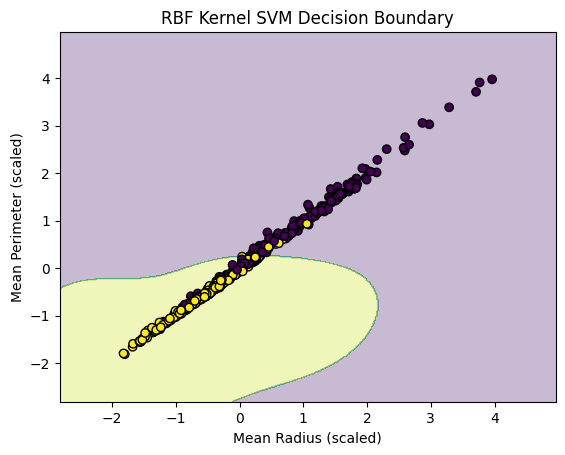

In [21]:
plot_db(svm_linear, X_train_scaled, y_train, "Linear SVM Decision Boundary")
plot_db(svm_rbf, X_train_scaled, y_train, "RBF Kernel SVM Decision Boundary")

Hyperparameters tuning

In [22]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best parameters from Grid Search:", grid.best_params_)

Best parameters from Grid Search: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


cross-validation evaluation 

In [23]:
y_pred = grid.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.90      0.97      0.93        71

    accuracy                           0.91       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix:
 [[35  8]
 [ 2 69]]


In [24]:
X_scaled = scaler.fit_transform(X_vis)

# Linear SVM with 5-fold CV
svm_linear = SVC(kernel='linear', C=1)
scores_linear = cross_val_score(svm_linear, X_scaled, y, cv=5)

# RBF SVM with 5-fold CV
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
scores_rbf = cross_val_score(svm_rbf, X_scaled, y, cv=5)

print("Linear SVM CV Scores:", scores_linear)
print("Linear SVM Mean Accuracy: {:.2f}%".format(np.mean(scores_linear) * 100))

print("\nRBF SVM CV Scores:", scores_rbf)
print("RBF SVM Mean Accuracy: {:.2f}%".format(np.mean(scores_rbf) * 100))

Linear SVM CV Scores: [0.81578947 0.86842105 0.90350877 0.93859649 0.90265487]
Linear SVM Mean Accuracy: 88.58%

RBF SVM CV Scores: [0.8245614  0.85964912 0.90350877 0.93859649 0.92035398]
RBF SVM Mean Accuracy: 88.93%


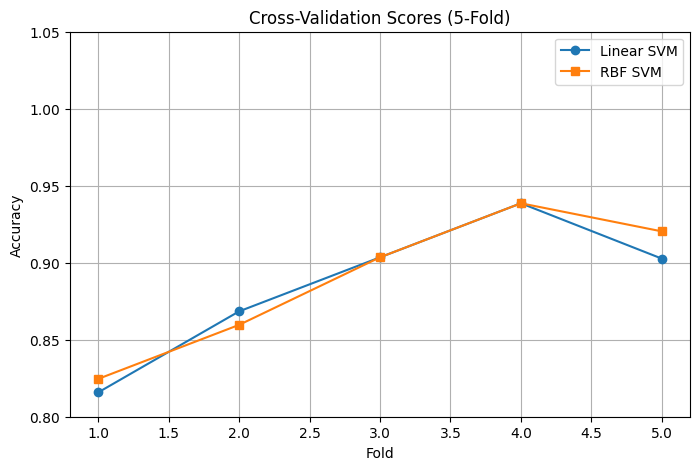

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), scores_linear, marker='o', label='Linear SVM')
plt.plot(range(1, 6), scores_rbf, marker='s', label='RBF SVM')
plt.title("Cross-Validation Scores (5-Fold)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.05)
plt.grid(True)
plt.legend()
plt.show()
